# Assignment: Decision trees and random forests

## Business understanding

Phishing websites are a major cybersecurity threat, aiming to steal sensitive information such as passwords or credit card details. Detecting them early is essential to protect users from financial loss, identity theft, and reputational damage.

The goal of this project is to test whether phishing websites can be reliably identified using simple, automatically collected features such as SSL certificate status, URL patterns, web traffic, and link structure. A successful model could support the development of an automated warning system that alerts users before they enter a phishing site.

Two approaches will be used:

1. **Decision Trees** – to create a transparent, human-readable model that can be directly translated into analyst instructions.

2. **Random Forests** – to improve predictive accuracy through an ensemble of decision trees.

The project seeks to balance interpretability and accuracy, laying the groundwork for a practical phishing detection tool.








Ultimately, the project aims to balance interpretability (decision tree rules that are understandable to an internet analyst) and accuracy (improved prediction via random forests). If successful, the models can form the foundation of a practical phishing detection tool, contributing to safer online interactions for end-users.


We are using the Phishing dataset that is available at the UCI Machine Learning Repository: [Phishing Websites Data Set](https://archive.ics.uci.edu/dataset/327/phishing+websites). The target variable Result indicates whether a website is a phishing site or not.

Note: As the interpretation of the -1’s and 1’s in the Result column seems to be missing from the document, it may be helpful to know that a ‘1‘ corresponds to a phishing site and a ‘-1’ to a legitimate site.

Our goal was to find out whether it is possible to reliably predict whether a website is a phishing site or not based on the easily obtainable information about the website. Based on the outcome, it is possible to construct an automated system that warns users when they are about to visit a phishing website.


## 2. Data understanding

Here we fetch the dataset using the provided import method for python. We also print metadata for the dataset, and information on contained variables.

The result variables meanings:
1) -1 = ok
2) 0 = sus
3) 1 = phis

In [222]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
  
# variable information 
display(phishing_websites.variables) 


,name,role,type,demographic,description,units,missing_values
0,having_ip_address,Feature,Integer,None,None,None,no
1,url_length,Feature,Integer,None,None,None,no
2,shortining_service,Feature,Integer,None,None,None,no
3,having_at_symbol,Feature,Integer,None,None,None,no
4,double_slash_redirecting,Feature,Integer,None,None,None,no
5,prefix_suffix,Feature,Integer,None,None,None,no
6,having_sub_domain,Feature,Integer,None,None,None,no
7,sslfinal_state,Feature,Integer,None,None,None,no
8,domain_registration_length,Feature,Integer,None,None,None,no
9,favicon,Feature,Integer,None,None,None,no


The variables contained in this dataset are:
<br>


| Feature                    | Explanation                                                                                   |
|-----------------------------|-----------------------------------------------------------------------------------------------|
| Using the IP Address        | If the URL uses an IP address instead of a domain name (phishers often hide domain names).    |
| URL-Length                  | Very long URLs can be suspicious (used to hide malicious parts).                              |
| Shortening-Service          | Use of services like bit.ly or tinyurl can hide the true destination.                         |
| having-At-Symbol            | An “@” symbol in a URL may redirect to a different site.                                      |
| double-slash-redirecting    | Extra `//` after the protocol may indicate redirection tricks.                                |
| Prefix-Suffix               | Use of a hyphen “-” in the domain (e.g., paypal-security.com) often mimics real sites.        |
| having-Sub-Domain           | Too many subdomains (e.g., login.bank.example.phish.com) can be a trick.                      |
| SSLfinal-State              | Checks if the SSL certificate is valid (fake or expired SSL is a warning sign).               |
| Domain-registration-length  | Domains registered for a very short time are more likely to be malicious.                     |
| Favicon                     | A favicon loaded from an external domain (not the main site) can signal phishing.             |
| port                        | Use of uncommon or suspicious ports instead of standard ones (80/443).                        |
| HTTPS-token                 | Misuse of “https” inside the domain name (e.g., https-login.com) to fake security.            |
| Request-URL                 | Percentage of external objects (images, scripts, etc.) loaded from outside domains.           |
| URL-of-Anchor               | Percentage of anchor (`<a>`) tags leading to outside or empty links.                          |
| Links-in-tags               | Percentage of links inside `<meta>`, `<script>`, and `<link>` tags pointing outside.          |
| SFH (Server Form Handler)   | Where a form submits data (if empty or external, suspicious).                                 |
| Submitting-to-email         | Forms that submit directly to an email instead of a server.                                   |
| Abnormal_URL                | Whether the domain matches its WHOIS registration info (fake mismatch = phishing).            |
| Redirect                    | Number of times the site redirects (too many = suspicious).                                   |
| On-mouseover                | If hovering changes the link shown in the status bar (a common phishing trick).               |
| RightClick                  | Disabling right-click to prevent users from inspecting elements or code.                      |
| popUpWindow                 | Presence of pop-ups, often used in scams.                                                     |
| Iframe                      | Use of hidden frames (`<iframe>`) to load content secretly from other sites.                  |
| Age-of-domain               | Newly created domains are more likely to be phishing.                                         |
| DNSRecord                   | Missing or abnormal DNS records may indicate a fake site.                                     |
| Web-traffic                 | Very low traffic rank (site is not popular/legitimate).                                       |
| Page-Rank                   | Low Google PageRank means the site isn’t trusted.                                             |
| Google-Index                | If the site is not indexed by Google, it may be suspicious.                                   |
| Links-pointing-to-page      | Few or no inbound links suggest a fake site.                                                  |
| Statistical-report          | Matches known phishing/malware sites in public blacklists/statistical reports.                |







## 3. Data preparation

The data:

In [223]:
display(X.head())
display(y.head())

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


,result
0,-1
1,-1
2,-1
3,-1
4,1


Tarkistetaan onko vääriä arvoja seassa. Tulostetaan min ja max arvot

In [224]:
display(X.min())
display(X.max())


having_ip_address            -1
url_length                   -1
shortining_service           -1
having_at_symbol             -1
double_slash_redirecting     -1
prefix_suffix                -1
having_sub_domain            -1
sslfinal_state               -1
domain_registration_length   -1
favicon                      -1
port                         -1
https_token                  -1
request_url                  -1
url_of_anchor                -1
links_in_tags                -1
sfh                          -1
submitting_to_email          -1
abnormal_url                 -1
redirect                      0
on_mouseover                 -1
rightclick                   -1
popupwindow                  -1
iframe                       -1
age_of_domain                -1
dnsrecord                    -1
web_traffic                  -1
page_rank                    -1
google_index                 -1
links_pointing_to_page       -1
statistical_report           -1
dtype: int64

having_ip_address             1
url_length                    1
shortining_service            1
having_at_symbol              1
double_slash_redirecting      1
prefix_suffix                 1
having_sub_domain             1
sslfinal_state                1
domain_registration_length    1
favicon                       1
port                          1
https_token                   1
request_url                   1
url_of_anchor                 1
links_in_tags                 1
sfh                           1
submitting_to_email           1
abnormal_url                  1
redirect                      1
on_mouseover                  1
rightclick                    1
popupwindow                   1
iframe                        1
age_of_domain                 1
dnsrecord                     1
web_traffic                   1
page_rank                     1
google_index                  1
links_pointing_to_page        1
statistical_report            1
dtype: int64

Toteamme näin että dataset on valid.
Ei tarvitse standardisoida dataa koska teemme päätöspuita.

### Part 1 Decision tree

Your initial goal is to construct a small yet useful decision tree that predicts whether a website is a phishing site or not.

The outcome should contain the following:

An image of the final decision tree.
Evaluation metrics for the decision tree.
Written instructions for an internet analyst to manually make the decision of whether the website is likely to be a phishing site or not. The instructions must match one-to-one with your decision tree, and be written in a way that is understandable to an engineer who is aware of the basics of internet technologies.

Creating a tree classifier

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8291, 30) (2764, 30) (8291, 1) (2764, 1)


## 2. Modeling

Building a decision tree

In [226]:
tree = DecisionTreeClassifier(max_depth=4, random_state=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=20)

Visualize tree

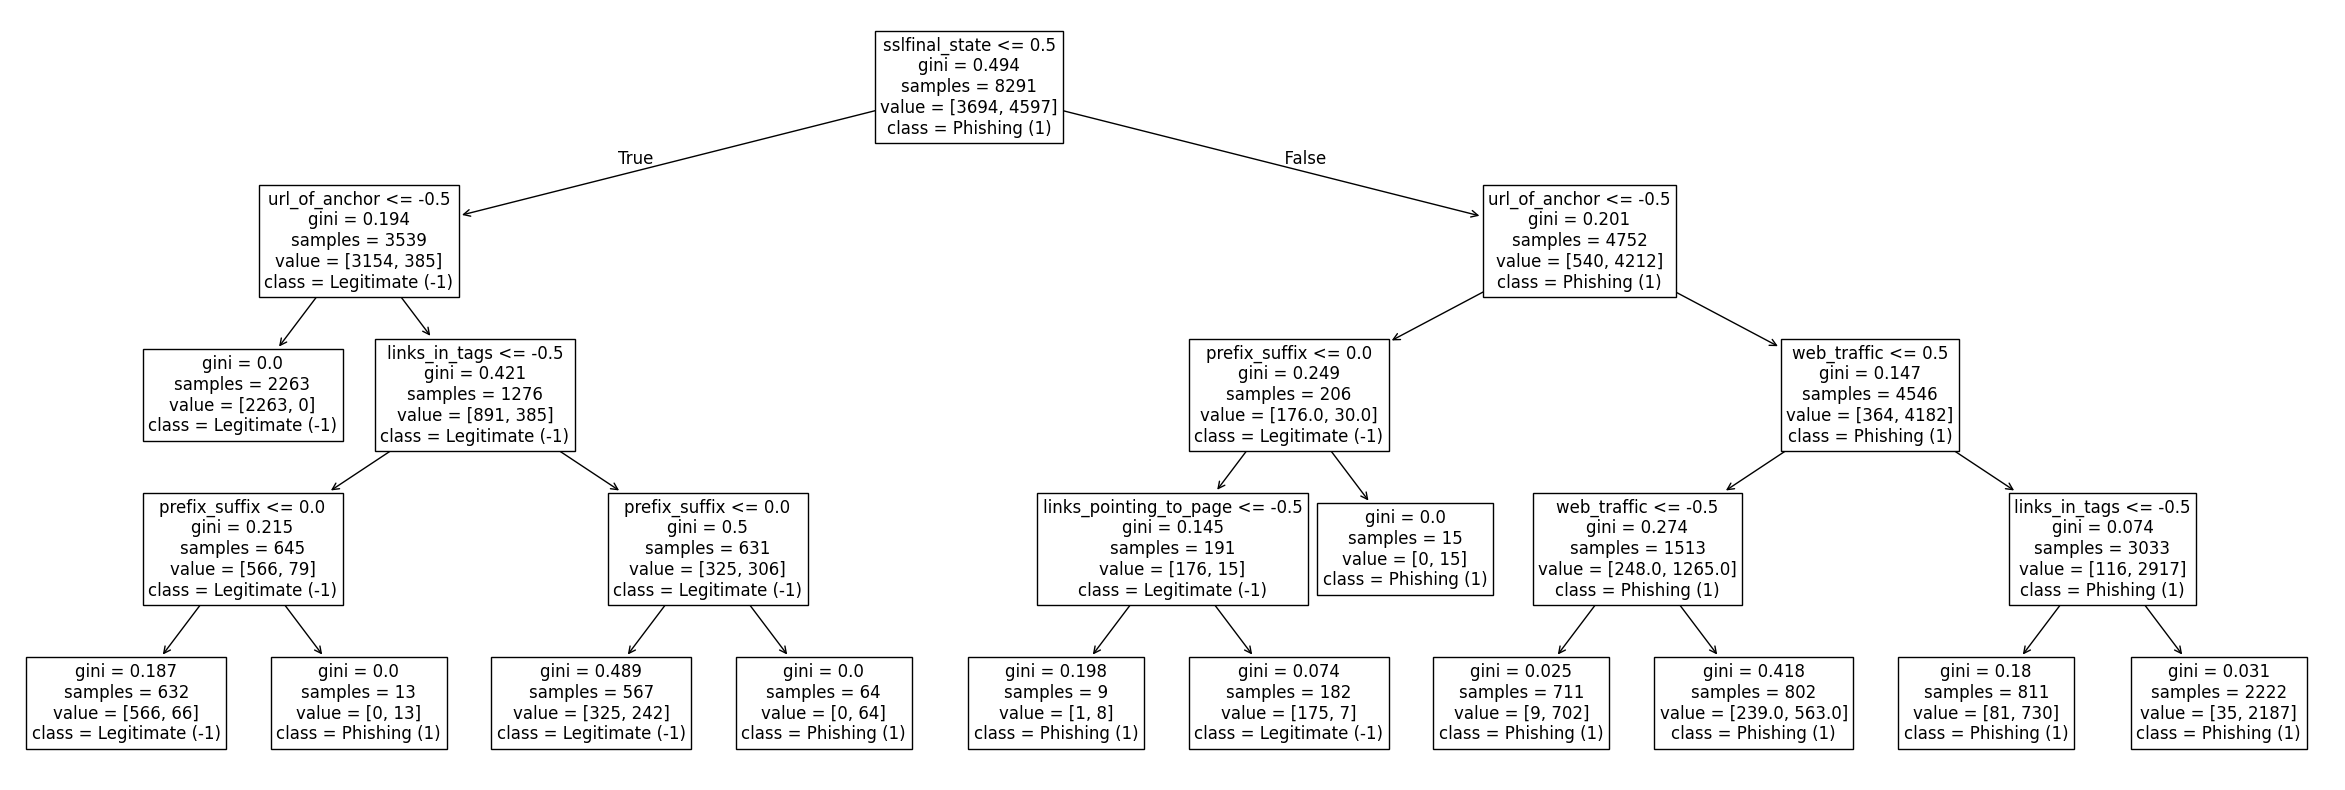

In [227]:
fig = plt.figure(figsize=(30, 10))
plot_tree(
    tree,
    feature_names=X.keys(),
    class_names=["Legitimate (-1)", "Phishing (1)"],
    fontsize=12  # larger text → larger boxes
)
plt.show()

## 5. Evaluation

Test the performance of classifier

In [228]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred2 = tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred2)
display(f"Accuracy of tree classifier on the test set: {accuracy_test:.2f}")
confusion_matrix(y_test, y_pred2)

'Accuracy of tree classifier on the test set: 0.92'

array([[1094,  110],
       [ 118, 1442]], dtype=int64)

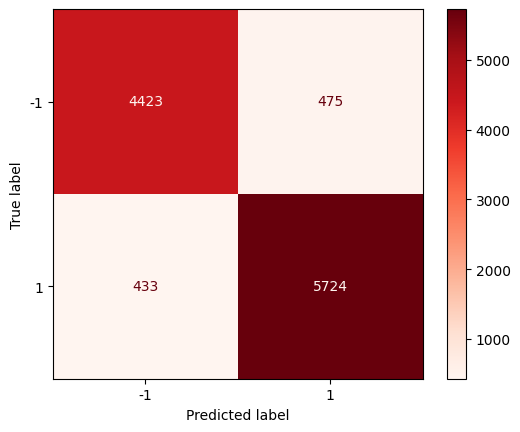

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels


y_pred = tree.predict(X)
labels = unique_labels(y, y_pred)
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap="Reds")

Puu syvyys 5 oli huonompi ennustamaan --> enemmän virheellisesti ennustettuja arvoja. 10 ennusti paremmin. Tämän vuoksi päädyimme syvyyteen 10.

Written instructions for an internet analyst to manually make the decision of whether the website is likely to be a phishing site or not. The instructions must match one-to-one with your decision tree, and be written in a way that is understandable to an engineer who is aware of the basics of internet technologies.